<h1><b>Лабораторная работа №4 </b></h1>
Линейные модели, SVM и деревья решений

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Загрузка и предобработка данных


In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

1) проверим наличие пропусков

In [5]:
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

2) масштабирование признаков

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3) Разделение на обучающую и тестовую выборки

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Обучение моделей

- логистическая регрессия
- SVM
- дерево решений

1) логистическая регрессия

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

2) SVM

In [14]:
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)
y_pred_svm = svm_reg.predict(X_test)

3) дерево решений

In [16]:
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

## Оценка качества моделей
accuracy и F1-score

In [13]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [19]:

print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R2-score:", r2_score(y_test, y_pred_lin))

print("\nSVM:")
print("MSE:", mean_squared_error(y_test, y_pred_svm))
print("R2-score:", r2_score(y_test, y_pred_svm))

print("\nDecision Tree:")
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R2-score:", r2_score(y_test, y_pred_tree))

Linear Regression:
MSE: 0.5305677824766754
R2-score: 0.5957702326061662

SVM:
MSE: 0.5543393535045007
R2-score: 0.5776591128877611

Decision Tree:
MSE: 0.6325363214073455
R2-score: 0.5180822912445064


## Важность признаков в дереве решений

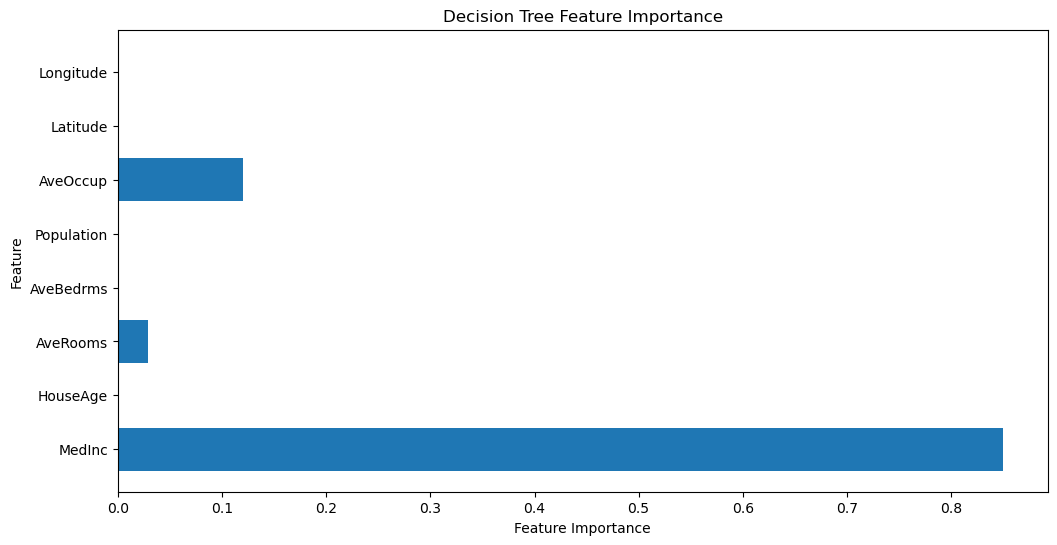

In [20]:
plt.figure(figsize=(12, 6))
plt.barh(data.feature_names, tree.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.show()

## Построение графика для визуализации важности признаков в дереве решений

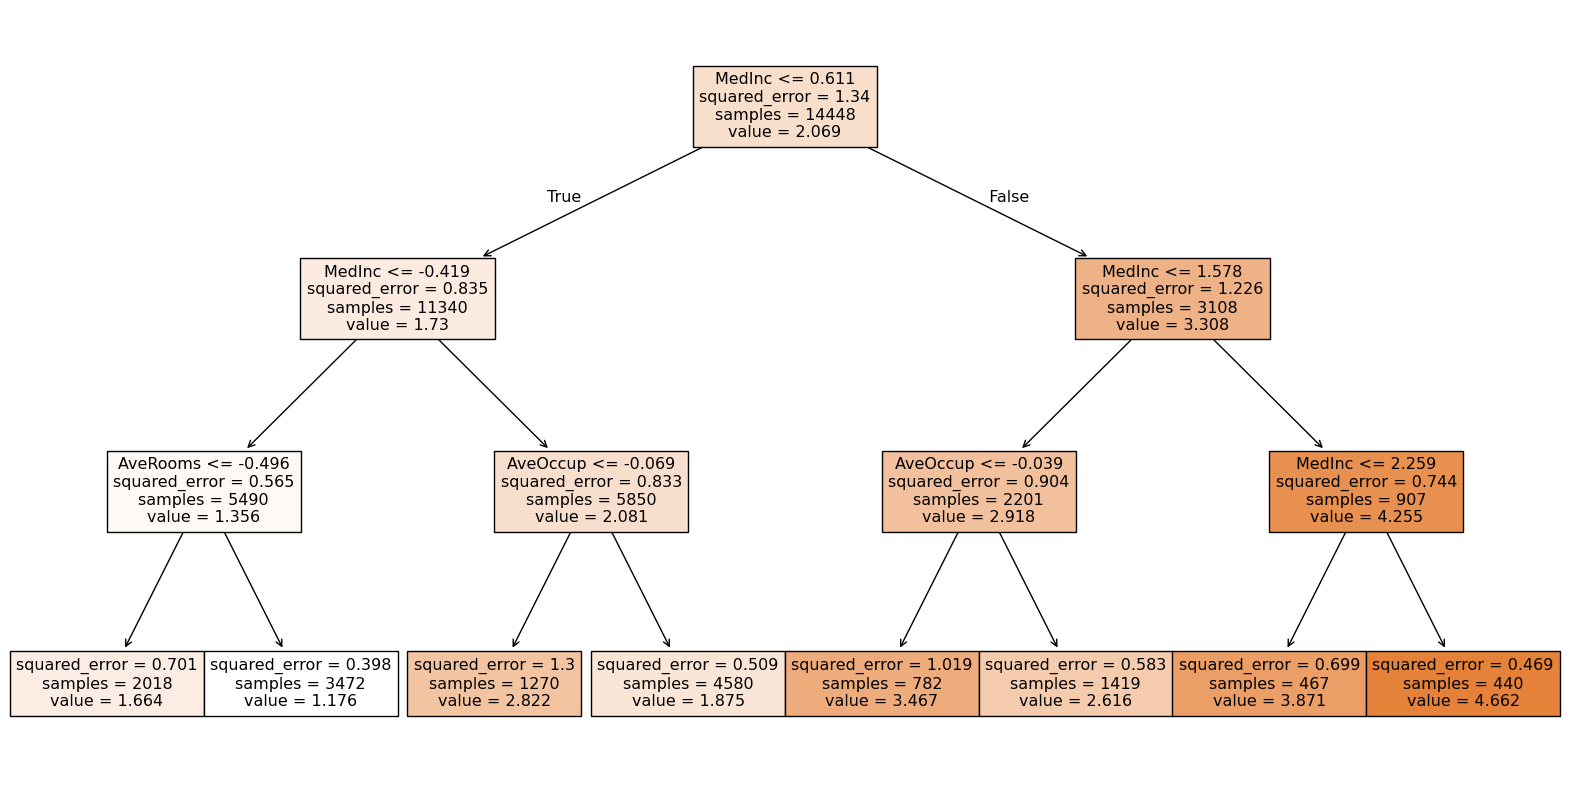

In [21]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()